In [5]:
from gensim.models import Word2Vec
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import random
from nltk.stem import WordNetLemmatizer
import logging
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [2]:
reviews = pd.read_json("mard/mard_reviews.json" , lines=True)
reviews.head()

,reviewerID,amazon-id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
0,A1OFY4ATO7D13W,0026197898,"Jacob Shepich ""Neo-Luddite""","[2, 2]",1355702400,Buy this album. Now. Don't worry about the re...,5,"12 17, 2012",PITCHFORK Eat your heart out!
1,A2KH83L1F70QR8,0026197898,"John Stockton ""JLS""","[1, 1]",1358121600,The Sudden Passion did a great job with this o...,5,"01 14, 2013",Americana from the Southlands
2,A1KGXC7IRLVJR3,0615205399,"Amy Elizabeth ""Amy""","[0, 0]",1214438400,I received this CD as a gift a few weeks ago f...,5,"06 26, 2008",It really works!
3,A1BT6LQ9NY6RO3,0615205399,"Jasa Swaze ""Jasa Swaze""","[1, 1]",1214352000,I am a beginner and have tried a couple of med...,5,"06 25, 2008",Change Your LIfe for the Better!
4,A206OKO2FE2IPL,0615205399,J. Jenson,"[1, 1]",1229212800,This is coming from a person that didn't belie...,5,"12 14, 2008",Mediation couldn't get any easier


In [3]:


def clean_text(text):
    text = text.lower()
    
    # Removing punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    # remove unnecessary whitespace
    text = re.sub("\s+"," ",text)
    
    # remove urls
    pattern = re.compile(r'https?://\S+|www\.\S+')
    text = pattern.sub('', text)
    
    # remove non-character
    text = re.sub("[^a-zA-Z]", " ", text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stop words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Joining tokens back into a sentence
    cleaned_text = " ".join(tokens)
    
    return cleaned_text


In [20]:
def parse_sent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(clean_text(raw_sentence))
            
    return sentences


In [21]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = []
n = len(reviews['reviewText'])

for i,review in enumerate(reviews['reviewText']):
    if ((i / n ) * 100) % 1 == 0: print(f"{(i / n ) * 100}%",end='\r')
        
    sentences += parse_sent(review, tokenizer)


In [30]:
# Fit parsed sentences to Word2Vec model 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

sentences = [nltk.word_tokenize(sent) for sent in sentences]

num_features = 300  #embedding dimension                     
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count = min_word_count, window = context, sample = downsampling)

2023-12-07 15:03:12,435 : INFO : collecting all words and their counts
2023-12-07 15:03:12,462 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-12-07 15:03:12,574 : INFO : PROGRESS: at sentence #10000, processed 97318 words, keeping 12206 word types


Training Word2Vec model ...



2023-12-07 15:03:12,733 : INFO : PROGRESS: at sentence #20000, processed 196605 words, keeping 19271 word types
2023-12-07 15:03:12,841 : INFO : PROGRESS: at sentence #30000, processed 297879 words, keeping 28030 word types
2023-12-07 15:03:12,994 : INFO : PROGRESS: at sentence #40000, processed 397418 words, keeping 35389 word types
2023-12-07 15:03:13,052 : INFO : PROGRESS: at sentence #50000, processed 499996 words, keeping 43158 word types
2023-12-07 15:03:13,113 : INFO : PROGRESS: at sentence #60000, processed 601822 words, keeping 49555 word types
2023-12-07 15:03:13,168 : INFO : PROGRESS: at sentence #70000, processed 703000 words, keeping 56012 word types
2023-12-07 15:03:13,225 : INFO : PROGRESS: at sentence #80000, processed 811041 words, keeping 61994 word types
2023-12-07 15:03:13,296 : INFO : PROGRESS: at sentence #90000, processed 920643 words, keeping 68652 word types
2023-12-07 15:03:13,360 : INFO : PROGRESS: at sentence #100000, processed 1022592 words, keeping 73944 w

2023-12-07 15:03:16,257 : INFO : PROGRESS: at sentence #740000, processed 7524094 words, keeping 314223 word types
2023-12-07 15:03:16,373 : INFO : PROGRESS: at sentence #750000, processed 7619112 words, keeping 317200 word types
2023-12-07 15:03:16,414 : INFO : PROGRESS: at sentence #760000, processed 7720767 words, keeping 320233 word types
2023-12-07 15:03:16,449 : INFO : PROGRESS: at sentence #770000, processed 7820078 words, keeping 323503 word types
2023-12-07 15:03:16,480 : INFO : PROGRESS: at sentence #780000, processed 7913776 words, keeping 327021 word types
2023-12-07 15:03:16,509 : INFO : PROGRESS: at sentence #790000, processed 8010174 words, keeping 329768 word types
2023-12-07 15:03:16,538 : INFO : PROGRESS: at sentence #800000, processed 8109594 words, keeping 332751 word types
2023-12-07 15:03:16,562 : INFO : PROGRESS: at sentence #810000, processed 8194334 words, keeping 334634 word types
2023-12-07 15:03:16,584 : INFO : PROGRESS: at sentence #820000, processed 827565

2023-12-07 15:03:23,094 : INFO : PROGRESS: at sentence #1450000, processed 14366693 words, keeping 500154 word types
2023-12-07 15:03:23,181 : INFO : PROGRESS: at sentence #1460000, processed 14459269 words, keeping 502288 word types
2023-12-07 15:03:23,280 : INFO : PROGRESS: at sentence #1470000, processed 14557063 words, keeping 505013 word types
2023-12-07 15:03:23,391 : INFO : PROGRESS: at sentence #1480000, processed 14658715 words, keeping 507740 word types
2023-12-07 15:03:23,494 : INFO : PROGRESS: at sentence #1490000, processed 14750711 words, keeping 509409 word types
2023-12-07 15:03:23,582 : INFO : PROGRESS: at sentence #1500000, processed 14844454 words, keeping 511526 word types
2023-12-07 15:03:23,670 : INFO : PROGRESS: at sentence #1510000, processed 14939084 words, keeping 513519 word types
2023-12-07 15:03:23,756 : INFO : PROGRESS: at sentence #1520000, processed 15033253 words, keeping 515764 word types
2023-12-07 15:03:23,823 : INFO : PROGRESS: at sentence #1530000,

2023-12-07 15:03:57,016 : INFO : worker thread finished; awaiting finish of 0 more threads
2023-12-07 15:03:57,017 : INFO : EPOCH - 1 : training on 16301746 raw words (14509561 effective words) took 27.5s, 527173 effective words/s
2023-12-07 15:03:58,036 : INFO : EPOCH 2 - PROGRESS: at 5.34% examples, 816527 words/s, in_qsize 7, out_qsize 0
2023-12-07 15:03:59,042 : INFO : EPOCH 2 - PROGRESS: at 11.09% examples, 853654 words/s, in_qsize 8, out_qsize 0
2023-12-07 15:04:00,047 : INFO : EPOCH 2 - PROGRESS: at 16.49% examples, 851877 words/s, in_qsize 8, out_qsize 0
2023-12-07 15:04:01,100 : INFO : EPOCH 2 - PROGRESS: at 20.09% examples, 766288 words/s, in_qsize 7, out_qsize 2
2023-12-07 15:04:02,105 : INFO : EPOCH 2 - PROGRESS: at 22.94% examples, 696444 words/s, in_qsize 7, out_qsize 0
2023-12-07 15:04:03,112 : INFO : EPOCH 2 - PROGRESS: at 27.53% examples, 694725 words/s, in_qsize 7, out_qsize 0
2023-12-07 15:04:04,131 : INFO : EPOCH 2 - PROGRESS: at 33.60% examples, 719201 words/s, in_

2023-12-07 15:04:58,770 : INFO : EPOCH 5 - PROGRESS: at 35.95% examples, 902891 words/s, in_qsize 7, out_qsize 0
2023-12-07 15:04:59,771 : INFO : EPOCH 5 - PROGRESS: at 42.13% examples, 902188 words/s, in_qsize 7, out_qsize 0
2023-12-07 15:05:00,777 : INFO : EPOCH 5 - PROGRESS: at 48.53% examples, 903726 words/s, in_qsize 7, out_qsize 0
2023-12-07 15:05:01,788 : INFO : EPOCH 5 - PROGRESS: at 55.18% examples, 907635 words/s, in_qsize 7, out_qsize 0
2023-12-07 15:05:02,790 : INFO : EPOCH 5 - PROGRESS: at 62.01% examples, 913662 words/s, in_qsize 7, out_qsize 0
2023-12-07 15:05:03,800 : INFO : EPOCH 5 - PROGRESS: at 68.60% examples, 915527 words/s, in_qsize 7, out_qsize 0
2023-12-07 15:05:04,807 : INFO : EPOCH 5 - PROGRESS: at 75.17% examples, 917795 words/s, in_qsize 7, out_qsize 0
2023-12-07 15:05:05,811 : INFO : EPOCH 5 - PROGRESS: at 82.28% examples, 923774 words/s, in_qsize 7, out_qsize 0
2023-12-07 15:05:06,820 : INFO : EPOCH 5 - PROGRESS: at 89.34% examples, 929922 words/s, in_qsiz

In [31]:
w2v.save("w2v_1") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index_to_key)) #4016 
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index_to_key[0:10])

2023-12-07 15:10:54,938 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'w2v_1', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-12-07T15:10:54.937452', 'gensim': '4.1.2', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'saving'}
2023-12-07 15:10:54,957 : INFO : storing np array 'vectors' to w2v_1.wv.vectors.npy
2023-12-07 15:10:55,753 : INFO : storing np array 'syn1neg' to w2v_1.syn1neg.npy
2023-12-07 15:10:56,471 : INFO : not storing attribute cum_table
2023-12-07 15:10:58,057 : INFO : saved w2v_1


Number of words in the vocabulary list : 47207 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['song', 'album', 'cd', 'music', 'one', 'like', 'great', 'sound', 'love', 'good']


In [7]:
w2v = Word2Vec.load('w2v_1')
words = list(w2v.wv.key_to_index.keys())
vectors = np.array([w2v.wv[word] for word in words])

# vectors = np.apply_along_axis(min_max , axis=1, arr=vectors)
#print(vectors)

tsne = TSNE(n_components=2, random_state=42, verbose=1)
embeddings_2d = tsne.fit_transform(vectors)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 47207 samples in 0.005s...
[t-SNE] Computed neighbors for 47207 samples in 14.660s...
[t-SNE] Computed conditional probabilities for sample 1000 / 47207
[t-SNE] Computed conditional probabilities for sample 2000 / 47207
[t-SNE] Computed conditional probabilities for sample 3000 / 47207
[t-SNE] Computed conditional probabilities for sample 4000 / 47207
[t-SNE] Computed conditional probabilities for sample 5000 / 47207
[t-SNE] Computed conditional probabilities for sample 6000 / 47207
[t-SNE] Computed conditional probabilities for sample 7000 / 47207
[t-SNE] Computed conditional probabilities for sample 8000 / 47207
[t-SNE] Computed conditional probabilities for sample 9000 / 47207
[t-SNE] Computed conditional probabilities for sample 10000 / 47207
[t-SNE] Computed conditional probabilities for sample 11000 / 47207
[t-SNE] Computed conditional probabilities for sample 12000 / 47207
[t-SNE] Computed conditional probabilities for sa

[818, 1889, 479, 130, 1447, 889, 9628, 1457, 963, 1803, 1082, 3592, 45, 2010, 62]


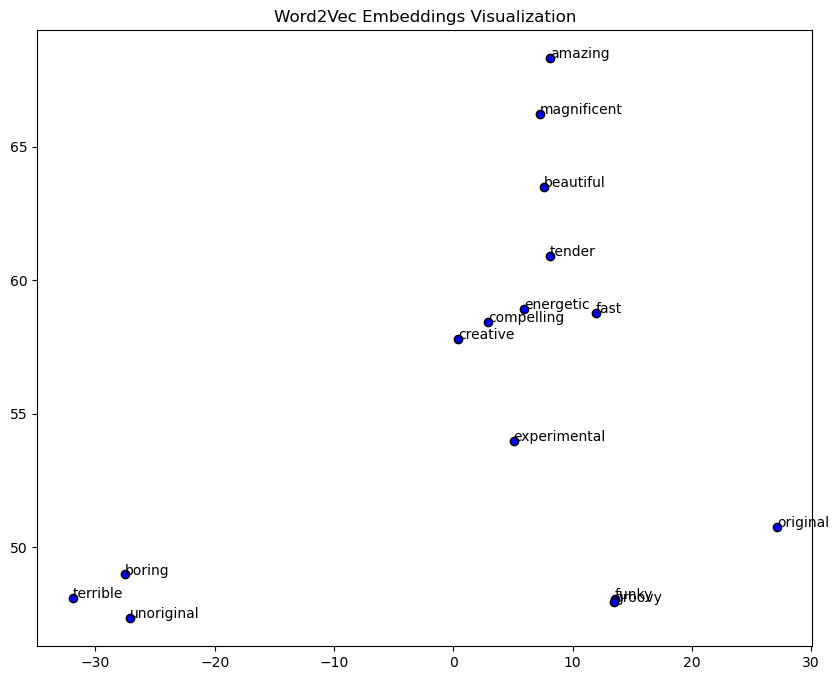

In [8]:
adj = [
    "Creative",
    
    "Experimental",
    "Fast",
    
    "Amazing",
    "Terrible",
    "Boring",
    "Unoriginal",
    "Energetic",
    "Magnificent",
    "Compelling",
    "Funky",
    "Groovy",
    "Original",
    
    "Tender",
    "Beautiful"
    
]

indices = [words.index(word.lower()) for word in adj if word.lower() in words]
print(indices)


embed = embeddings_2d[indices]
plt.figure(figsize=(10, 8))
plt.scatter(embed[:, 0], embed[:, 1], c='blue', edgecolors='k')

# Annotate points with words
for i in indices:
    word = words[i]
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('Word2Vec Embeddings Visualization')
plt.savefig('plots/w2v.png')
plt.show()

In [2]:
w2v = Word2Vec.load("w2v_1")
words = list(w2v.wv.key_to_index.keys())
vectors = np.array([w2v.wv[word] for word in words])
vectors.shape

(47207, 300)

In [36]:
for w in adj:
    sim = w2v.wv.most_similar(w.lower(), topn=5)
    print(f"{w.lower()}:\n")
    for s, d in sim:
        print(s, d)
    print("--------\n")

innovative:

inventive 0.752014696598053
groundbreaking 0.7066246271133423
creative 0.6713553667068481
sophisticated 0.6600141525268555
daring 0.6250919699668884
--------

creative:

innovative 0.6713553071022034
creativity 0.669906497001648
craft 0.6047523617744446
experimentation 0.5848227143287659
artistic 0.5836095809936523
--------

masterful:

superb 0.7226806879043579
marvelous 0.6969695091247559
exquisite 0.6969097256660461
brilliant 0.6827197670936584
astonishing 0.6736372709274292
--------

groundbreaking:

innovative 0.706624448299408
influential 0.5793827772140503
revolutionary 0.5691360831260681
ambitious 0.5568665266036987
experimental 0.5387303829193115
--------

compelling:

engaging 0.7377253770828247
gripping 0.7008187770843506
intriguing 0.7003751993179321
captivating 0.694156289100647
satisfying 0.6870032548904419
--------

energetic:

lively 0.7670530080795288
exuberant 0.7191052436828613
buoyant 0.6833670139312744
fastpaced 0.6592236161231995
propulsive 0.65739339

KeyError: "Key 'thought-provoking' not present"

In [ ]:
def generate_text_embedding(text, model):
    words = [word for word in text.split() if word in model.wv]
    if not words:
        return None  
    return sum(model.wv[words]) / len(words)  